In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn

To visualize the workings of machine learning algorithms, it is often helpful to study two-dimensional or one-dimensional data, that is data with only one or two features. While in practice, datasets usually have many more features, it is hard to plot high-dimensional data on two-dimensional screens.

We will illustrate some very simple examples before we move on to more "real world" data sets.

Classification
========
First, we will look at a two class classification problem in two dimensions. We use the synthetic data generated by the ``make_blobs`` function.

In [15]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=2, random_state=0)
print(X.shape)
print(y.shape)
print(X[:5, :])
print(y[:5])

(100, 2)
(100,)
[[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]]
[1 1 0 0 1]


As the data is two-dimensional, we can plot each sample as a point in two-dimensional space, with the first feature being the x-axis and the second feature being the y-axis.

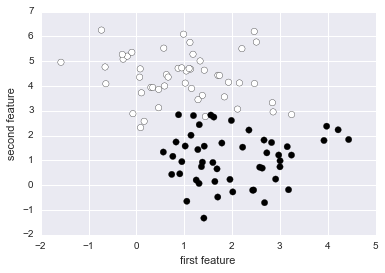

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
plt.xlabel("first feature")
plt.ylabel("second feature")

As classification is a supervised task, and we are interested in how well the model generalizes, we split our data into a training set,
to built the model from, and a test-set, to evaluate how well our model performs on new data. The ``train_test_split`` function form the ``cross_validation`` module does that for us, by randomly splitting of 25% of the data for testing.


In [17]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

K Nearest Neighbors
------------------------------------------------
A popular and easy to understand classifier is K nearest neighbors (kNN).  It has one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.


In [18]:
from sklearn.neighbors import KNeighborsClassifier

This time we set a parameter of the KNeighborsClassifier to tell it we only want to look at one nearest neighbor:

In [19]:
knn = KNeighborsClassifier(n_neighbors=9)

We fit the model with out training data

In [27]:
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [21]:
from figures import plot_2d_separator

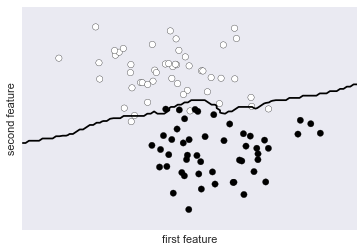

In [32]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator.plot_2d_separator(knn, X)

In [33]:
knn.score(X_test, y_test)

0.92000000000000004

## Using a different classifier

Now we'll take a few minutes and try out another learning model.  Because of ``scikit-learn``'s uniform interface, the syntax is identical to that of ``LinearSVC`` above.

There are many possibilities of classifiers; you could try any of the methods discussed at <http://scikit-learn.org/stable/supervised_learning.html>.  Alternatively, you can explore what's available in ``scikit-learn`` using just the tab-completion feature.  For example, import the ``linear_model`` submodule:

In [ ]:
from sklearn import linear_model

And use the tab completion to find what's available.  Type ``linear_model.`` and then the tab key to see an interactive list of the functions within this submodule.  The ones which begin with capital letters are the models which are available.

Now select a new classifier and try out a classification of the iris data.

Some good choices are

- ``sklearn.svm.LinearSVC`` :
    Support Vector Machines without kernels based on liblinear

- ``sklearn.svm.SVC`` :
    Support Vector Machines with kernels based on libsvm

- ``sklearn.linear_model.LogisticRegression`` :
    Regularized Logistic Regression based on liblinear

- ``sklearn.linear_model.SGDClassifier`` :
    Regularized linear models (SVM or logistic regression) using a Stochastic Gradient Descent algorithm written in Cython

- ``sklearn.neighbors.NeighborsClassifier`` :
    k-Nearest Neighbors classifier based on the ball tree datastructure for low dimensional data and brute force search for high dimensional data

- ``sklearn.naive_bayes.GaussianNB`` :
    Gaussian Naive Bayes model. This is an unsophisticated model which can be trained very quickly. It is often used to obtain baseline results before moving to a more sophisticated classifier.

- ``sklearn.tree.DecisionTreeClassifier`` :
  A classifier based on a series of binary decisions.  This is another very fast classifier, which can be very powerful.

Choose one of the above, import it, and use the ``?`` feature to learn about it.

In [18]:
from sklearn.linear_model import LogisticRegression 


Now instantiate this model as we did with ``LinearSVC`` above.  Call it ``clf``.

In [13]:
clf = LogisticRegression()


Now use our data ``X`` and ``y`` to train the model, using ``clf2.fit(X, y)``

In [23]:
clf.fit(X_train,y_train)

TypeError: unbound method fit() must be called with LogisticRegression instance as first argument (got ndarray instance instead)

Now call the ``predict`` method, and find the classification of ``X_new``.

Now use the code snippet in `Cell 16` to plot the corresponding graph

On the Iris Dataset
=========
**Exercise** Apply the KNeighborsClassifier to the ``iris`` dataset. Play with different values of the ``n_neighbors`` and observe how training and test score change.

Note: If you finish early, you can try applying a different estimator: `sklearn.svm.SVC`

In [ ]:
# %load scripts/knn_iris.py
from sklearn import neighbors, datasets
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap


# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

iris = datasets.load_iris()
X, y = iris.data, iris.target

# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(X, y)

# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
# call the "predict" method:
result = knn.predict([[3, 5, 4, 2],])
print(iris.target_names[result])


def plot_iris_knn():
    iris = datasets.load_iris()
    X = iris.data[:, :2]
    # we only take the first two features. We could
    # avoid this ugly slicing by using a two-dim dataset
    y = iris.target

    knn = neighbors.KNeighborsClassifier(n_neighbors=3)
    knn.fit(X, y)

    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pl.figure()
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    pl.xlabel('sepal length (cm)')
    pl.ylabel('sepal width (cm)')
    pl.axis('tight')


In [2]:
plot_iris_knn()

NameError: name 'plot_iris_knn' is not defined

## Support Vector Machines

Another powerful and highly effective method can be used for both Classification and Regression.

SVMs are a **discriminative** classifier: that is, they draw a boundary between clusters of data.

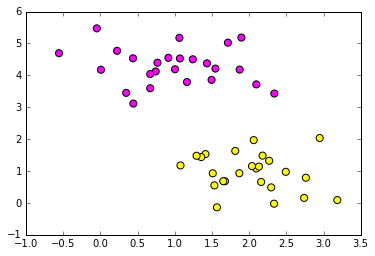

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring');

There can be many seperators for the dataset above. How the find the best one?

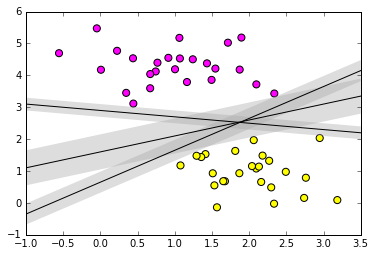

In [8]:
import numpy as np
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

### SVM's to the rescue :)

In [9]:
from sklearn.svm import SVC  # "Support Vector Classifier"
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    #print(Y,X)
    P = np.zeros_like(X)
    #print(P)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
           # print(P[i,j])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

In [34]:
vx=np.linspace(0,4,5)
vy=np.linspace(4,6,6)
print(vx,vy)
mx=np.meshgrid(vx,6)
print(mx)

(array([ 0.,  1.,  2.,  3.,  4.]), array([ 4. ,  4.4,  4.8,  5.2,  5.6,  6. ]))
[array([[ 0.,  1.,  2.,  3.,  4.]]), array([[6, 6, 6, 6, 6]])]


(array([[-1.        , -0.75862069, -0.51724138, -0.27586207, -0.03448276,
         0.20689655,  0.44827586,  0.68965517,  0.93103448,  1.17241379,
         1.4137931 ,  1.65517241,  1.89655172,  2.13793103,  2.37931034,
         2.62068966,  2.86206897,  3.10344828,  3.34482759,  3.5862069 ,
         3.82758621,  4.06896552,  4.31034483,  4.55172414,  4.79310345,
         5.03448276,  5.27586207,  5.51724138,  5.75862069,  6.        ],
       [-1.        , -0.75862069, -0.51724138, -0.27586207, -0.03448276,
         0.20689655,  0.44827586,  0.68965517,  0.93103448,  1.17241379,
         1.4137931 ,  1.65517241,  1.89655172,  2.13793103,  2.37931034,
         2.62068966,  2.86206897,  3.10344828,  3.34482759,  3.5862069 ,
         3.82758621,  4.06896552,  4.31034483,  4.55172414,  4.79310345,
         5.03448276,  5.27586207,  5.51724138,  5.75862069,  6.        ],
       [-1.        , -0.75862069, -0.51724138, -0.27586207, -0.03448276,
         0.20689655,  0.44827586,  0.68965517,  

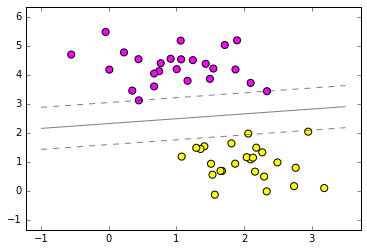

In [35]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf);

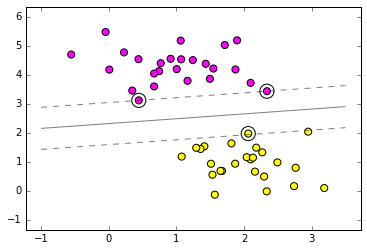

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

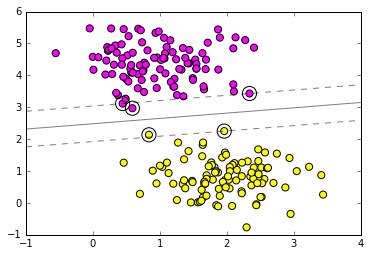

In [38]:
from IPython.html.widgets import interact

def plot_svm(N=10):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    clf = SVC(kernel='linear')
    clf.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
    plt.xlim(-1, 4)
    plt.ylim(-1, 6)
    plot_svc_decision_function(clf, plt.gca())
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=200, facecolors='none')
    
interact(plot_svm, N=[10, 200], kernel='linear');

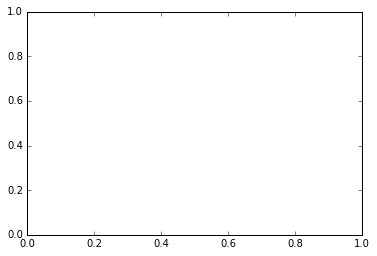

In [14]:
plt.gca()

#### What if the data is not linear?

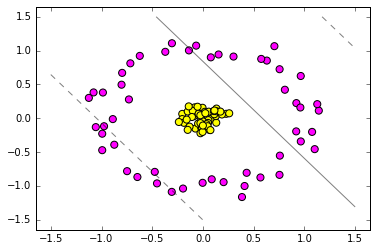

In [39]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf);